In [ ]:
import numpy as np, math
import pandas as pd
import matplotlib.pyplot as plt

lam_lu = 1.867e-11  # yr^-1

# initial conditions
hf_init_4p5 = 0.280017          # 176Hf/177Hf at 4.5 Ga
lu_hf_chur = 0.0332             # CHUR 176Lu/177Hf

def hf_after(initial_ratio, lu_hf, delta_years):
    return initial_ratio + lu_hf * (math.exp(lam_lu*delta_years) - 1.0)

# 1) CHUR present (delta = 4.5e9 years)
chur_present = hf_after(hf_init_4p5, lu_hf_chur, 4.5e9)

# 2) CHUR at 3.0 Ga (delta from 4.5 Ga to 3.0 Ga = 1.5e9)
chur_3ga = hf_after(hf_init_4p5, lu_hf_chur, 1.5e9)

# Reservoir Lu/Hf values (given)
lu_b = 0.0414   # depleted mantle residue
lu_c = 0.0219   # complementary basaltic crust
lu_d = 0.0005   # zircon

# Evolve from 3.0 Ga -> present (delta = 3.0e9 yrs)
b_present = hf_after(chur_3ga, lu_b, 3.0e9)
c_present = hf_after(chur_3ga, lu_c, 3.0e9)
d_present = hf_after(chur_3ga, lu_d, 3.0e9)

# epsilon Hf:
def eps_hf(sample, chur_present):
    return (sample/chur_present - 1.0) * 1e4


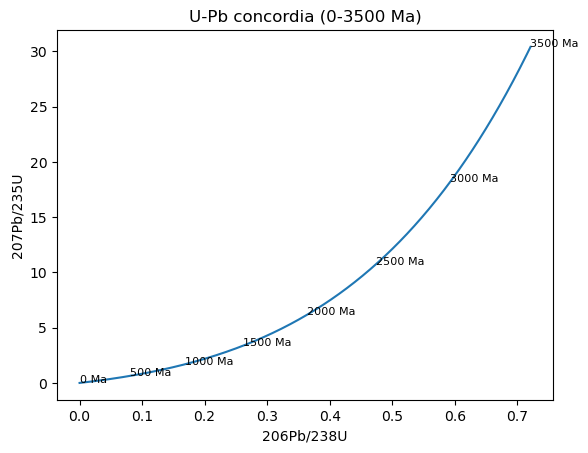

In [4]:

lam238 = 1.55125e-10
lam235 = 9.8485e-10
t_yr = np.linspace(0, 3.5e9, 500)
x = np.exp(lam238*t_yr) - 1.0  # 206Pb/238U
y = np.exp(lam235*t_yr) - 1.0  # 207Pb/235U

plt.plot(x, y)
plt.xlabel('206Pb/238U')
plt.ylabel('207Pb/235U')
# annotate a few ages:
for age_Ga in [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]:
    age = age_Ga * 1e9
    xi = np.exp(lam238*age) - 1
    yi = np.exp(lam235*age) - 1
    plt.text(xi, yi, f'{int(age_Ga*1000)} Ma', fontsize=8)
plt.title('U-Pb concordia (0-3500 Ma)')
plt.show()


In [ ]:
x = np.array([87.71,209.2,27.8,141.7,73.08,257.7,263.5,281.1])
y = np.array([0.77999,0.88424,0.72951,0.82569,0.76731,0.92449,0.92847,0.94542])
sy = np.array([4e-5,2e-5,3e-5,4e-5,2e-5,2e-5,4e-5,5e-5])
w = 1.0/(sy**2)

xbar = np.sum(w*x)/np.sum(w)
ybar = np.sum(w*y)/np.sum(w)
slope = np.sum(w*(x-xbar)*(y-ybar)) / np.sum(w*(x-xbar)**2)
intercept = ybar - slope*xbar
var_slope = 1.0/np.sum(w*(x-xbar)**2)
var_intercept = np.sum(w*x**2)/(np.sum(w)*np.sum(w*(x-xbar)**2))
slope_err = np.sqrt(var_slope)
intercept_err = np.sqrt(var_intercept)

# convert slope to age:
lam_rb = 1.397e-11
age_yr = np.log(1.0 + slope)/lam_rb
age_Ma = age_yr/1e6
age_err_Ma = (slope_err/((1+slope)*lam_rb)) / 1e6

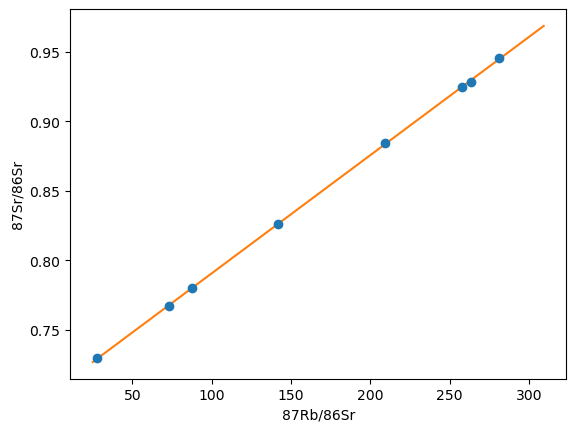

In [ ]:


# plotting
plt.errorbar(x, y, yerr=sy, fmt='o')
xs = np.linspace(min(x)*0.9, max(x)*1.1, 200)
plt.plot(xs, intercept + slope*xs, '-')
plt.xlabel('87Rb/86Sr')
plt.ylabel('87Sr/86Sr')
plt.show()

In [6]:
Sr = np.array([221,298,476,900,1551], dtype=float)
R = np.array([0.7124,0.7097,0.7067,0.7043,0.7032])
x = 1.0/Sr
A = np.vstack([x, np.ones_like(x)]).T
m, b = np.linalg.lstsq(A, R, rcond=None)[0]
RA = 0.7180
RB = 0.7025
CA = m/(RA - b)
CB = m/(RB - b)
pA = (Sr - CB)/(CA - CB)